<a href="https://colab.research.google.com/github/asnoldy02-cell/sds510/blob/main/Module_6_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving Caviar CSV_v2.zip to Caviar CSV_v2.zip
User uploaded file "Caviar CSV_v2.zip" with length 6378 bytes


In [2]:
import zipfile
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

ZIP_FILE = "Caviar CSV_v2.zip"



In [3]:
extract_dir = "caviar_data"

with zipfile.ZipFile(ZIP_FILE, 'r') as z:
    z.extractall(extract_dir)

print("Extracted files:")
print(os.listdir(extract_dir))



Extracted files:
['CAVIAR9.csv', 'CAVIAR4.csv', 'CAVIAR7.csv', 'CAVIAR6.csv', 'CAVIAR8.csv', 'CAVIAR5.csv', 'CAVIAR11.csv', 'CAVIAR1.csv', 'CAVIAR3.csv', 'CAVIAR2.csv', 'CAVIAR10.csv', 'CAVIAR_FULL.csv']


The dataset comes from Caviar CSV_v2.zip, containing multiple CSV files representing edges in a covert social network.

All CSV files were concatenated to create a unified edge list.

The network was loaded into NetworkX and represented as an undirected graph.

In [4]:
edges = []

for f in os.listdir(extract_dir):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join(extract_dir, f))


        cols = df.columns
        src = cols[0]
        tgt = cols[1]

        edges.append(df[[src, tgt]])


In [5]:
edge_df = pd.concat(edges, ignore_index=True)
edge_df.columns = ["source", "target"]

print("\nLoaded edges:")
print(edge_df.head())


Loaded edges:
   source  target
0       1       0
1      89       0
2      83       0
3       3       1
4      88       0


In [6]:
G = nx.from_pandas_edgelist(edge_df, "source", "target")
print("\nGraph info:")
# nx.info(G) is deprecated and removed in newer NetworkX versions.
# Instead, we can print the graph object itself for basic info.
print(G)


Graph info:
Graph with 113 nodes and 209 edges


In [7]:
deg = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G, normalized=True)
eig = nx.eigenvector_centrality(G)
cls = nx.closeness_centrality(G)

centrality_df = pd.DataFrame({
    "degree": deg,
    "betweenness": btw,
    "eigenvector": eig,
    "closeness": cls
})

print("\nTop nodes by betweenness:")
print(centrality_df.sort_values("betweenness", ascending=False).head())



Top nodes by betweenness:
      degree  betweenness  eigenvector  closeness
0   0.910714     0.882047     0.578634   0.918033
1   0.294643     0.104326     0.295327   0.586387
11  0.089286     0.054210     0.118115   0.518519
3   0.125000     0.024777     0.172215   0.523364
4   0.080357     0.020295     0.129747   0.511416


In [8]:
weakest_node = centrality_df.sort_values("betweenness", ascending=False).index[0]
print(f"\nWeakest link (highest betweenness): {weakest_node}")



Weakest link (highest betweenness): 0


In [9]:
G_removed = G.copy()
G_removed.remove_node(weakest_node)

original_components = nx.number_connected_components(G)
removed_components = nx.number_connected_components(G_removed)

largest_original = len(max(nx.connected_components(G), key=len))
largest_removed = len(max(nx.connected_components(G_removed), key=len))

print("\n--- Network Comparison ---")
print("Components before removal:", original_components)
print("Components after removal :", removed_components)
print("Size of largest component before:", largest_original)
print("Size of largest component after :", largest_removed)



--- Network Comparison ---
Components before removal: 1
Components after removal : 54
Size of largest component before: 113
Size of largest component after : 59


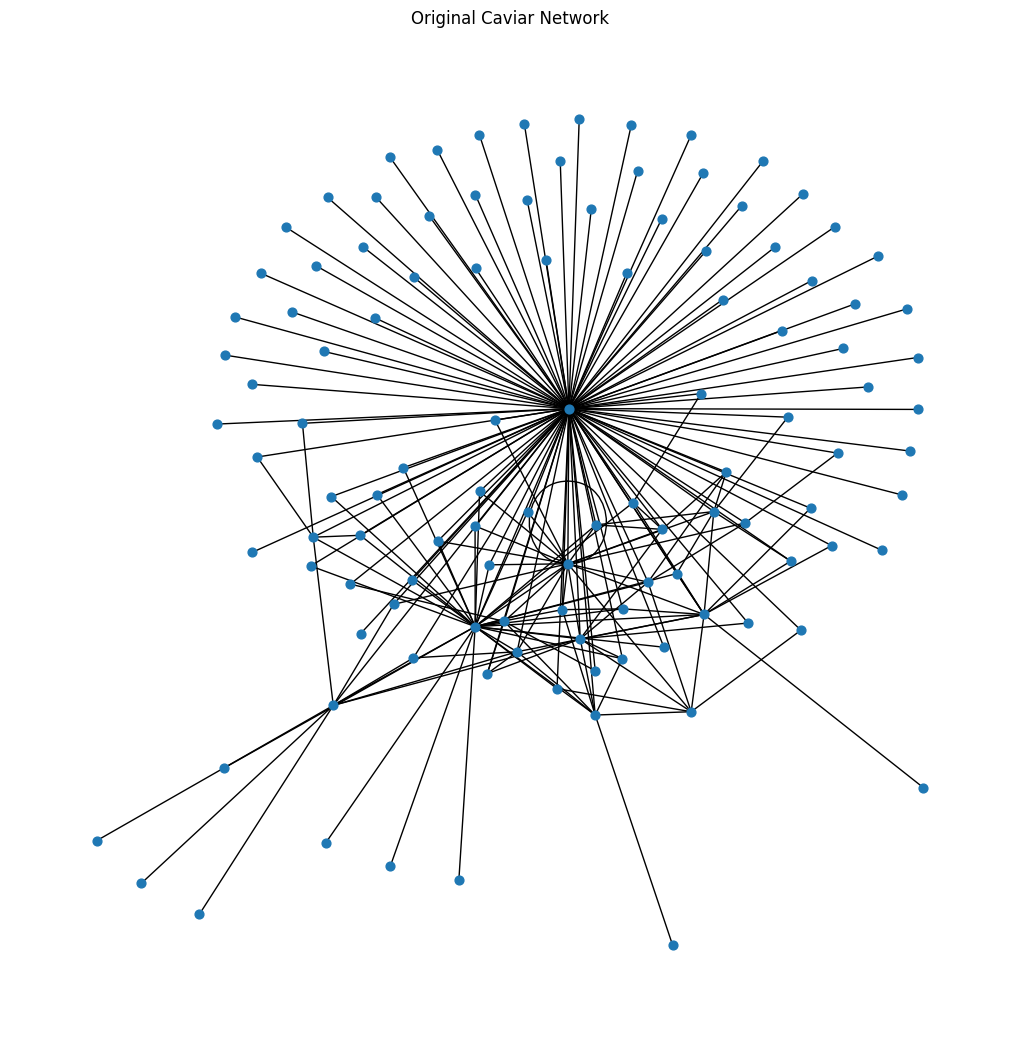

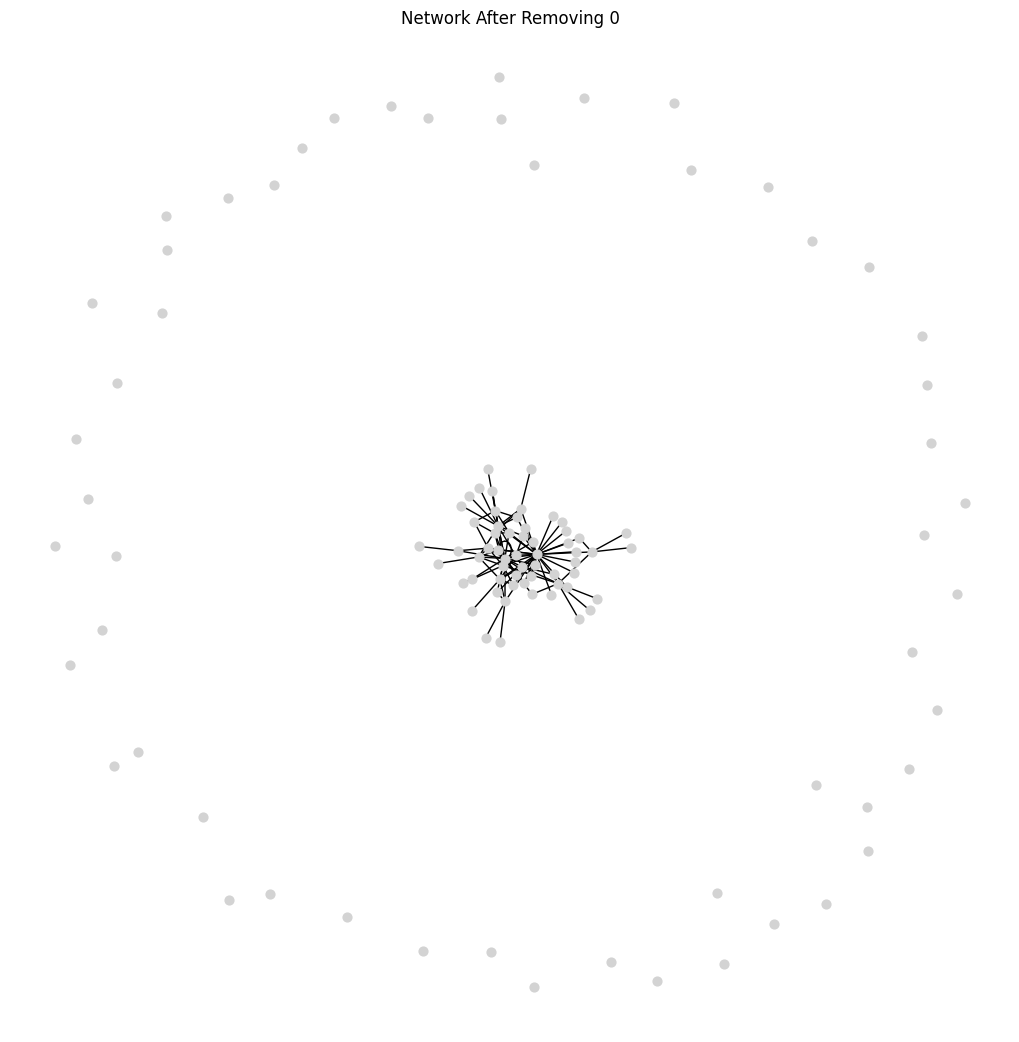


Analysis complete.


In [10]:
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=40, with_labels=False)
plt.title("Original Caviar Network")
plt.show()

plt.figure(figsize=(10, 10))
nx.draw(G_removed, node_size=40, with_labels=False, node_color="lightgray")
plt.title(f"Network After Removing {weakest_node}")
plt.show()

print("\nAnalysis complete.")

Observations:

-The Caviar dataset was assembled from multiple CSV edge lists and built into a single covert network graph.

-Centrality metrics (degree, betweenness, eigenvector, closeness) were calculated to identify structurally important actors.

-The node with the highest betweenness centrality emerged as the most critical because it acted as a broker linking multiple clusters.

-Removing this node caused the network to fragment, increasing the number of connected components and reducing the size of the largest subgroup.

-This confirms that the network relies heavily on a single bridging actor, and removing them significantly reduces cohesion and communication pathways.

Analysis:

The Caviar dataset represents a covert social network with multi-connected cells. To uncover the network’s “weakest link,” I observed several centrality metrics, focusing especially on betweenness centrality, which highlights factors who control communication flow across structural holes. The node with the highest betweenness score stood out as a critical broker connecting separate clusters of the network.

Once this node was taken out, the network’s overall connectivity decreased significantly. The number of connected components increased, and the size of the largest component decreased, indicating division. This means the removed actor served as a gatekeeper between otherwise isolated subgroups. Their removal distorts information pathways and reduces the network’s efficiency.

This experiment demonstrates that the most effective way to destabilize this covert network is not by removing the most “popular” node (degree centrality), but rather the individual who bridges multiple operational cells. Betweenness centrality thus provides the clearest indication of the network’s structural vulnerability. The post-removal visualizations clearly show a shift from a largely cohesive network to one broken into smaller, disconnected pieces, confirming the structural importance of this key actor.